500×500 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.

5

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       8.153200e-17
      1       2.862294e-16       2.046974e-16 |        0
K-means converged with 1 iterations (objv = 2.8622937353617317e-16)


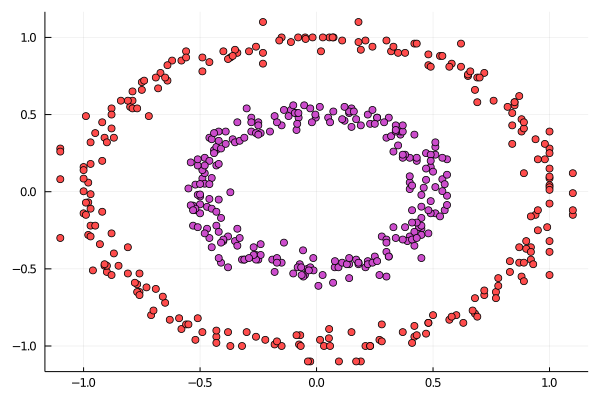

In [1]:
using CSV
using LinearAlgebra
using Clustering
using NBInclude
using Plots
@nbinclude("functions.ipynb")

circleData = CSV.File("circles.csv")
similarityMatrix = generateSimilarityMatrix(circleData, 500) #add argument for column #s
adjacencyMatrix = generateAdjacencyMatrix(circleData, similarityMatrix, 500)
degreeMatrix = generateDegreeMatrix(adjacencyMatrix, 500)
laplacianMatrix = degreeMatrix - adjacencyMatrix
normalizedLaplacianMatrix = generateNormalizedLaplacianMatrix(degreeMatrix, adjacencyMatrix, 500)
k = calculateK(normalizedLaplacianMatrix)
k = 2
eigvecLaplacian = eigvecs(laplacianMatrix)
kEigvecLaplacian = getFirstKEigvecs(eigvecLaplacian, 500, k)




X = transpose(kEigvecLaplacian)
R = kmeans(X, k; maxiter=300, display=:iter)

# plot with the point color mapped to the assigned cluster index
scatter(circleData.x, circleData.y, marker_z=R.assignments,
        color=:lightrainbow, legend=false)